In [1]:
from scipy.io import loadmat
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [5]:
data_file = loadmat('/hhome/ps2g02/Graph-Anomaly-Detection/Data/YelpChi.mat')
labels = data_file['label'].flatten()
feat_data = data_file['features'].todense().A



In [6]:
# The first 3304 nodes are not labeled
count_labels = Counter(labels[3305:])
percentages = {k: v/len(labels[3305:]) for k, v in count_labels.items()}
print("Proportion of each class in the labeled data:")
print(f"\tClass 0: {percentages[0]:.2%}")
print(f"\tClass 1: {percentages[1]:.2%}")
print("Number of labeled nodes:", len(labels[3305:]))
print("Total number of nodes:", len(labels))
print("Number of features:", feat_data.shape[1])

Proportion of each class in the labeled data:
	Class 0: 84.34%
	Class 1: 15.66%
Number of labeled nodes: 42649
Total number of nodes: 45954
Number of features: 32


In [7]:
print('Number of nodes:', len(labels))

Number of nodes: 45954


In [8]:
with open('/hhome/ps2g02/Graph-Anomaly-Detection/Data/yelp_homo_adjlists.pickle', 'rb') as file:
    homo = pickle.load(file)
file.close()

In [9]:
list_edges = []
for i in range(len(labels)):
    list_edges.append(len(homo[i]))

print(f"Average number of edges per node: {np.mean(list_edges):.4}")
print(f"Median number of edges per node: {np.median(list_edges)}")

Average number of edges per node: 168.4
Median number of edges per node: 169.0


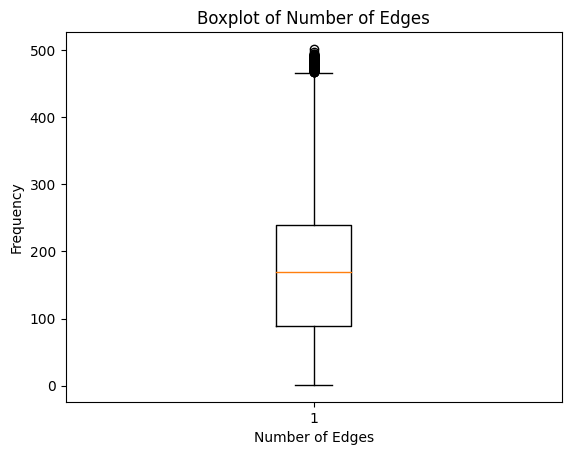

In [10]:
plt.boxplot(list_edges)
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title('Boxplot of Number of Edges')
plt.show()


Visualize the TSNE for the Yelp dataset

In [ ]:
from scipy.io import loadmat
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(feat_data)  # Assuming the first 3304 are unlabeled and hence excluded

# Separating the reduced features by their labels for plotting
X_tsne_benign = X_tsne[labels == 0]
X_tsne_fraudulent = X_tsne[labels == 1]

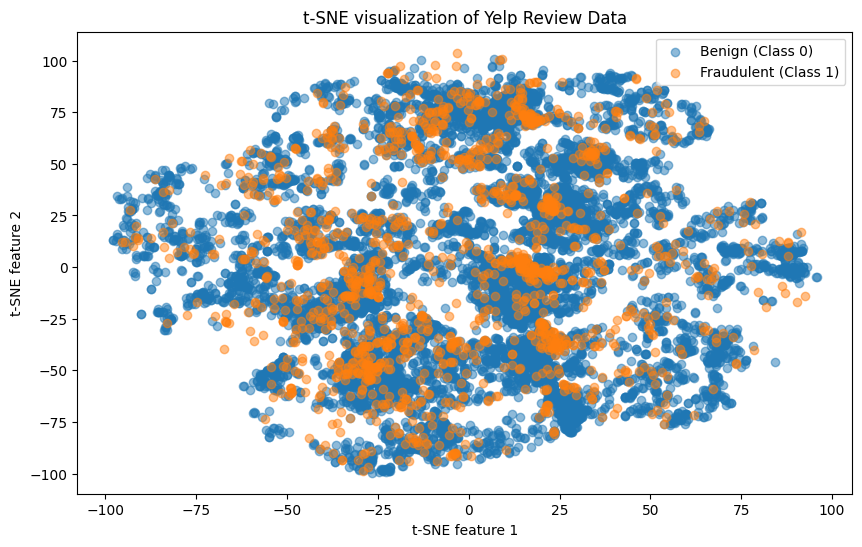

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne_benign[:, 0][:10000], X_tsne_benign[:, 1][:10000], label='Benign (Class 0)', alpha=0.5)
plt.scatter(X_tsne_fraudulent[:, 0][:1500], X_tsne_fraudulent[:, 1][:1500], label='Fraudulent (Class 1)', alpha=0.5)
plt.title('t-SNE visualization of Yelp Review Data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend()
plt.show()
